# housing price prediction

### goal : predict the house prices in districts using regrasson 

# get the data

In [1]:
import os 
import urllib
import tarfile

In [2]:
DOWNLOAD_ROOT= "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasetes','housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data (housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path , 'housing.tgz')
    urllib.request.urlretrieve(housing_url , tgz_path)
    tgz_file = tarfile.open(tgz_path)
    tgz_file.extractall(path = housing_path)
    tgz_file.close()

In [4]:
#fetch_housing_data()

# load the data

In [5]:
import pandas as pd 
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path , 'housing.csv')
    return pd.read_csv(csv_path)

## take a look at big picture

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


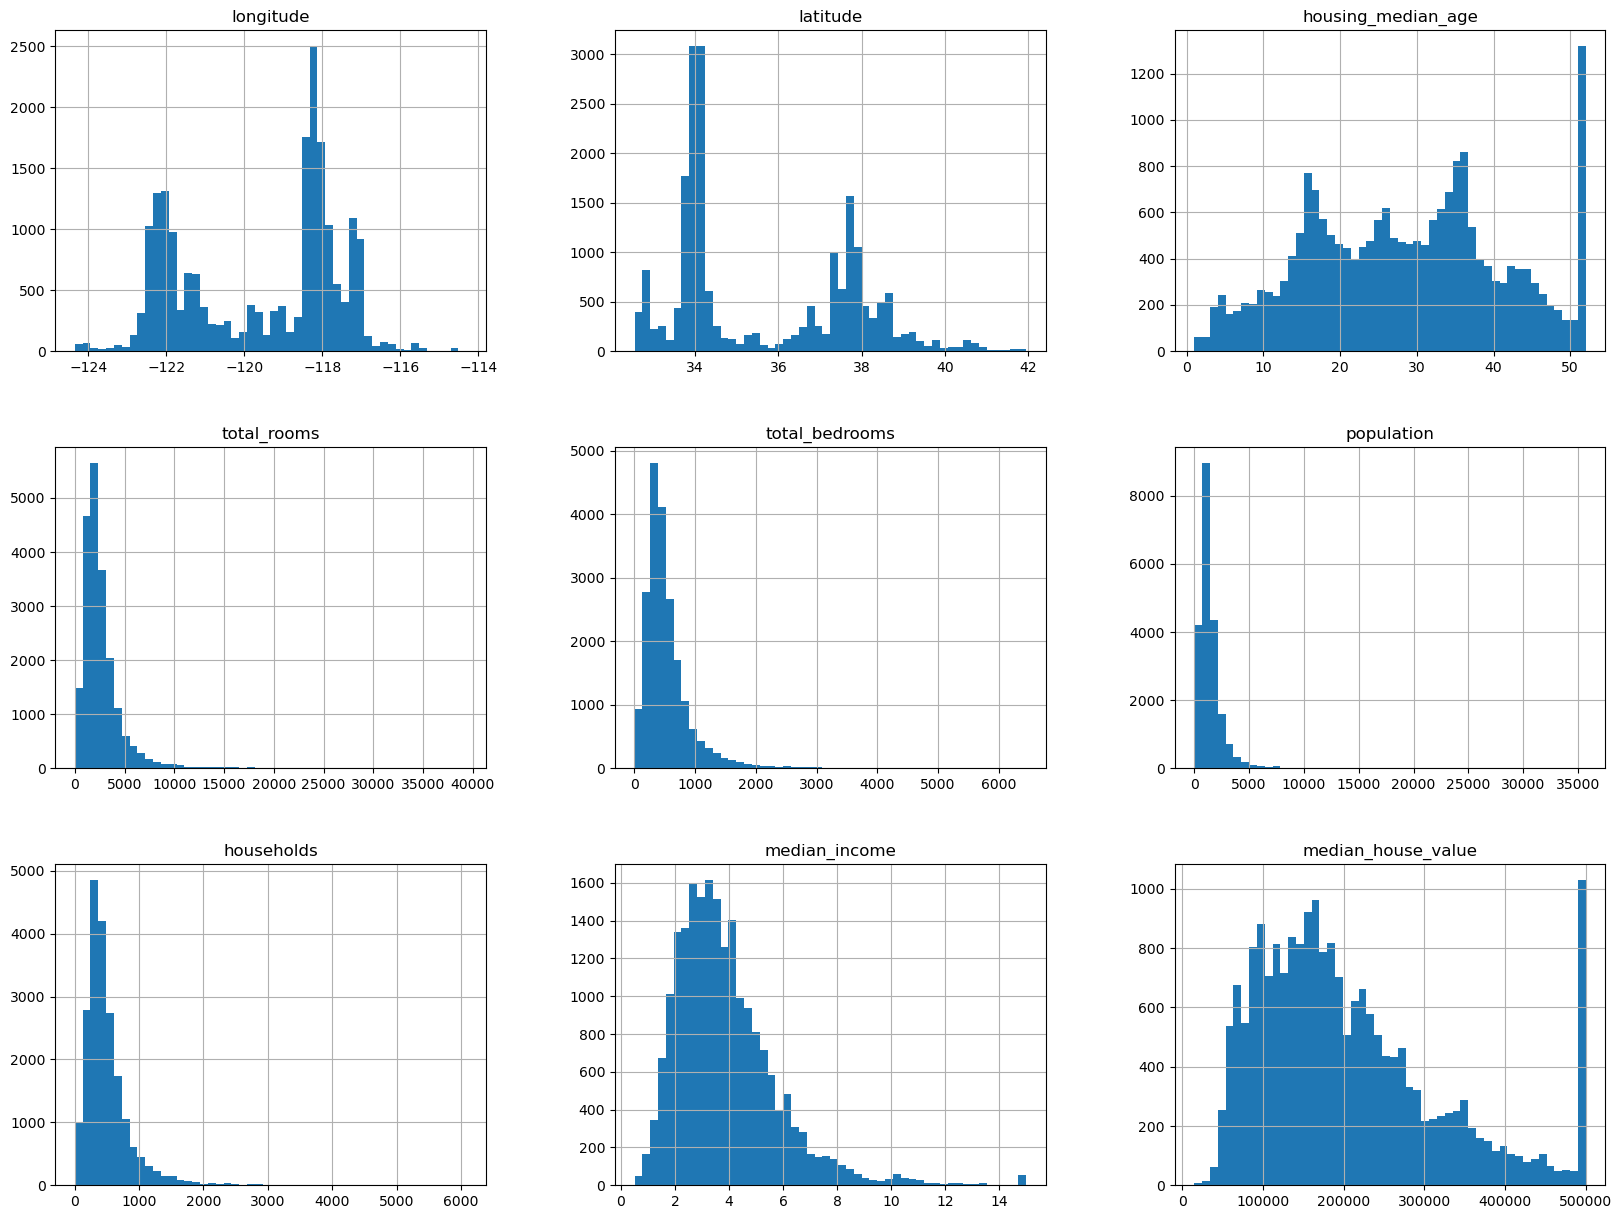

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 

housing.hist(bins=50 , figsize=(20,15))
plt.show()

## splite the data into train and test sets

### make a stratified sample based on median income 

transform the median income into catagorices

<Axes: >

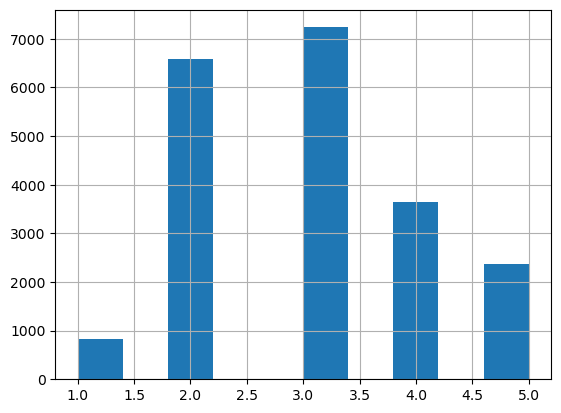

In [11]:
import numpy as np
housing["income_cat"]= pd.cut(housing['median_income'], bins=[0. , 1.5 , 3. , 4.5 , 6., np.inf] ,labels = [1,2,3,4,5] )
housing['income_cat'].hist()


## splite the dataset into the test and train set

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

delete the Additional income_cat column

In [13]:
for set_ in strat_train_set , strat_test_set:
    set_.drop('income_cat', axis =1 , inplace = True)

dont look at the test set 
we make a copy of the train set for 
### gain insight

In [14]:
housing = strat_train_set.copy()

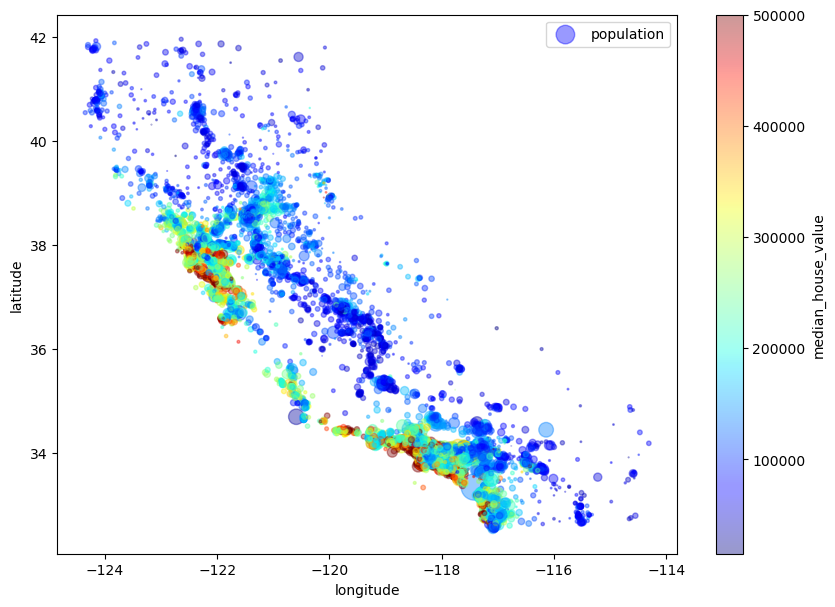

In [15]:
housing.plot(kind='scatter', x="longitude" ,y='latitude',alpha=0.4, s=housing['population']/100,label='population' , c='median_house_value',cmap=plt.get_cmap('jet'), figsize=(10,7))
plt.legend()

we can undrestand from the data that districtes near the bay has higher median_house_value

## now lets look at the corrolations between attributes

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

we can undrestand that median_income has the most corrolation with median_value

## we can use pandas scatter matrix to compare two attribute

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='population'>,
        <Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>]], dtype=object)

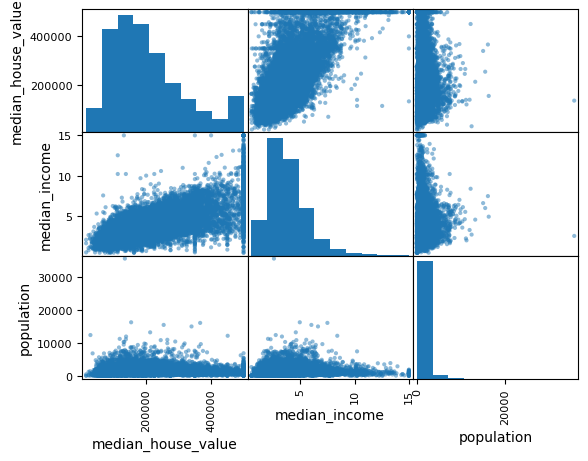

In [17]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','population']
scatter_matrix(housing[attributes])

we can see that median_income clearlly has corrolation with median_value

we can do some future engeeniering here 
for example it is more resonable to devide total bedrooms to total rooms 
or devide population to housholds
or devide total rooms to houshols

In [18]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

### and now lets look at corolation again 

In [19]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# cleaning the data


### first we should make a copy from dataset without the lables

In [20]:
housing = strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set['median_house_value']

we see that we have some none values in our dataset we should manage that

In [21]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity' , axis=1)
imputer.fit(housing_num)
x = imputer.transform(housing_num)

housing_tr = pd.DataFrame(x , columns= housing_num.columns , index = housing_num.index)

## handle catagorical attributes

### because ocean_proximity is our catagorical attribute we use one_hot encoding

In [22]:
hosing_cat = housing[['ocean_proximity']]
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(hosing_cat)

### we can write some custom transformrs to do our feature engeneering

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## then we can make a pipeline for feature scaleing

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ("std_scaler" , StandardScaler()),
])

husing_num_tr = num_pipeline.fit_transform(housing_num)

### make a coulumn transformer to handle both numeric and catagorical attribs

In [25]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline , num_attribs),
    ('cat' , OneHotEncoder() , cat_attribs),
])


In [26]:
housing_prepared = full_pipeline.fit_transform(housing)

now our data is redy lets ...

# train a model

### first of all lets train a simple model and see how good is that

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared , housing_labels)

LinearRegression()

lets see how well it preform

In [68]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

it is a big number we may face a underfitting problem lets test a more powerfull model 

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared , housing_labels)

DecisionTreeRegressor()

In [73]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels , housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

now it seems we have a overfiting problem we use cross validation sets to test it because we are not suppose to look at the tes set

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg , housing_prepared , housing_labels , scoring="neg_mean_squared_error" , cv =10)
tree_rmse_scores = np.sqrt(-scores)

In [77]:
def display_scores(scores) : 
    print('scores:' , scores)
    print('mean:' , scores.mean())
    print('standard_deviation:' , scores.std())

In [78]:
display_scores(tree_rmse_scores)

scores: [71811.66301398 70350.09009024 68933.10035427 70507.45418565
 69430.12208061 78281.35905866 70879.46620016 73373.1090355
 68808.48973258 71696.50391877]
mean: 71407.13576704316
standard_deviation: 2652.451247640577


now we can see defently we face a overfiting problem so now we can use a simplere model or add some data 

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels)

RandomForestRegressor()

In [30]:
housing_predictons = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels , housing_predictons)
forest_rsme = np.sqrt(forest_mse)
forest_rsme

NameError: name 'mean_squared_error' is not defined

it looks like this model is better than the other ones let's test it on the cross validation set 

In [85]:
scores = cross_val_score(forest_reg , housing_prepared , housing_lables , scoring='neg_mean_squared_error', cv = 10 )
forest_rmse_scores = np.sqrt(-scores)

In [86]:
display_scores(forest_rmse_scores)

scores: [51569.0208605  48913.24887269 46563.97928487 52372.03906295
 47459.15934013 52214.33985468 52255.71757356 50043.09470176
 48903.78555025 53829.78717339]
mean: 50412.41722747905
standard_deviation: 2273.610114734564


as you can see this model works better even on the cross_val set 

## save the model 

In [ ]:
import joblib

joblib.dump(forest_reg , "my_model.pkl")

# fine_tune your model

## we consider that you had train some models and you had saved them

###  grid search (we use forest model as an example)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3,10,30] , 'max_features': [2,4,6,8]},
             {'bootstrap':[False] , 'n_estimators': [3,10] , 'max_features':[2,3,4]},]

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring='neg_mean_squared_error' , return_train_score = True)
grid_search.fit(housing_prepared , housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [28]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
curves = grid_search.cv_results_

for mean_score , params in zip(curves['mean_test_score'] , curves['params']): print (np.sqrt(-mean_score) , params)


{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30)
63974.59179723422 {'max_features': 2, 'n_estimators': 3}
55624.86991722434 {'max_features': 2, 'n_estimators': 10}
52792.032387460946 {'max_features': 2, 'n_estimators': 30}
59120.88520375901 {'max_features': 4, 'n_estimators': 3}
53392.487182672085 {'max_features': 4, 'n_estimators': 10}
50430.53681538822 {'max_features': 4, 'n_estimators': 30}
58734.7271864431 {'max_features': 6, 'n_estimators': 3}
52231.87692125823 {'max_features': 6, 'n_estimators': 10}
49963.79502475208 {'max_features': 6, 'n_estimators': 30}
58937.211017132315 {'max_features': 8, 'n_estimators': 3}
52149.23769984865 {'max_features': 8, 'n_estimators': 10}
49911.945974091606 {'max_features': 8, 'n_estimators': 30}
62334.98430779642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53973.87402585738 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59867.39213823197 {'bootstrap': False, 'max_features': 

lets save the fine_tuned model

In [29]:
final_model = grid_search.best_estimator_
import joblib

joblib.dump(final_model , "final_model.pkl")

['final_model.pkl']

## now lets test the model with the test set

In [36]:
from sklearn.metrics import mean_squared_error
x_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)
predictions = final_model.predict(x_test_prepared)

finall_mse = mean_squared_error(predictions , y_test)
finall_rmse = np.sqrt(finall_mse)

In [38]:
from scipy import stats
confidence = 0.95
squared_errors = (predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([45561.20638098, 49524.70647546])

## notice : you must not change the model base on the results get from the test set 

and you can now lunch the model 

## lets look at another model

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
grid_params = [{
    'kernel':['linear'] , "C": [2,4,6] , 'gamma':[10,20]} , 
    {
        'kernel':['rbf'] , "C": [2,8,6] , 'gamma':[2,20]},
    
]
grid_search = GridSearchCV(svr , grid_params , cv = 5 , scoring='neg_mean_squared_error' ,return_train_score = True )
grid_search.fit(housing_prepared , housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [2, 4, 6], 'gamma': [10, 20],
                          'kernel': ['linear']},
                         {'C': [2, 8, 6], 'gamma': [2, 20], 'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
curves = grid_search.cv_results_

for mean_score , params in zip(curves['mean_test_score'] , curves['params']): print (np.sqrt(-mean_score) , params)


{'C': 6, 'gamma': 10, 'kernel': 'linear'}
SVR(C=6, gamma=10, kernel='linear')
107140.2596216261 {'C': 2, 'gamma': 10, 'kernel': 'linear'}
107140.2596216261 {'C': 2, 'gamma': 20, 'kernel': 'linear'}
98413.48468796615 {'C': 4, 'gamma': 10, 'kernel': 'linear'}
98413.48468796615 {'C': 4, 'gamma': 20, 'kernel': 'linear'}
92196.76911951666 {'C': 6, 'gamma': 10, 'kernel': 'linear'}
92196.76911951666 {'C': 6, 'gamma': 20, 'kernel': 'linear'}
118912.38516804077 {'C': 2, 'gamma': 2, 'kernel': 'rbf'}
118939.4442069892 {'C': 2, 'gamma': 20, 'kernel': 'rbf'}
118851.49908763304 {'C': 8, 'gamma': 2, 'kernel': 'rbf'}
118938.12779249008 {'C': 8, 'gamma': 20, 'kernel': 'rbf'}
118872.13832481844 {'C': 6, 'gamma': 2, 'kernel': 'rbf'}
118938.56657414445 {'C': 6, 'gamma': 20, 'kernel': 'rbf'}


In [40]:
svr_model = grid_search.best_estimator_
import joblib

joblib.dump(svr_model , "svr_model.pkl")

['svr_model.pkl']

In [32]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
grid_params = [{
    'kernel':['linear'] , "C": [2,10,27,1000,100] , 'gamma':[1,3,46,100,1000,10,20]} , 
    {
        'kernel':['rbf'] , "C": [1,2,8,6,100,1000,456] , 'gamma':[1,34,425,100,314,20000,2,20]},
    
]
r_svr = RandomizedSearchCV(svr ,grid_params, n_iter = 10 ,cv = 5 , scoring='neg_mean_squared_error' ,return_train_score = True )
r_svr.fit(housing_prepared , housing_labels)

print(r_svr.best_params_)
print(r_svr.best_estimator_)
curves = r_svr.cv_results_

for mean_score , params in zip(curves['mean_test_score'] , curves['params']): print (np.sqrt(-mean_score) , params)


{'kernel': 'linear', 'gamma': 10, 'C': 10}
SVR(C=10, gamma=10, kernel='linear')
118864.74929672328 {'kernel': 'rbf', 'gamma': 1, 'C': 2}
118939.61563161967 {'kernel': 'rbf', 'gamma': 34, 'C': 2}
84649.6069847477 {'kernel': 'linear', 'gamma': 10, 'C': 10}
118897.1133480066 {'kernel': 'rbf', 'gamma': 20, 'C': 456}
118935.99864945323 {'kernel': 'rbf', 'gamma': 425, 'C': 1000}
118872.13832481844 {'kernel': 'rbf', 'gamma': 2, 'C': 6}
84649.6069847477 {'kernel': 'linear', 'gamma': 20, 'C': 10}
118939.6837812699 {'kernel': 'rbf', 'gamma': 100, 'C': 2}
118926.4047727685 {'kernel': 'rbf', 'gamma': 2, 'C': 1}
84649.6069847477 {'kernel': 'linear', 'gamma': 3, 'C': 10}
